![alt text](img/LM.png)
# Kurs: Analiza danych i programowanie w Pythonie
## Piotr Ćwiakowski

### Lekcja 11. Case study: Explanatory Data Analysis w Pythonie

#### Spis treści

1. Bikesharing case study

## 1. Bikesharing case study

Zacznijmy od analizy szeregu czasowych popytu na rowery miejskie. Opis danych i sam plik znajdują się w folderze datasets.

In [1]:
# =========================================
# Data Set
# =========================================
# Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather 
# conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data 
# set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, 
# Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. We aggregated the data 
# on two hourly and daily basis and then extracted and added the corresponding weather and seasonal information. Weather 
# information are extracted from http://www.freemeteo.com. 

# =========================================
# Dataset characteristics
# =========================================	
# Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
# 	- instant: record index
# 	- dteday : date
# 	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
# 	- yr : year (0: 2011, 1:2012)
# 	- mnth : month ( 1 to 12)
# 	- hr : hour (0 to 23)
# 	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
# 	- weekday : day of the week
# 	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
# 	+ weathersit : 
# 		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# 	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
# 	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
# 	- hum: Normalized humidity. The values are divided to 100 (max)
# 	- windspeed: Normalized wind speed. The values are divided to 67 (max)
# 	- casual: count of casual users
# 	- registered: count of registered users
# 	- cnt: count of total rental bikes including both casual and registered

In [1]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
# from colormaps import cmaps 
%matplotlib inline

## 1. Wczytanie i podstawowa analiza zbioru (pakiet pandas)

Źródło: https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile

In [14]:
# Wczytanie danych
bs = pd.read_csv("datasets/bikesharing_prepared.csv", index_col = 0)

In [15]:
# Sprawdźmy kształt
bs.shape

(10886, 13)

In [16]:
# Kilka pierwszych obserwacji
bs.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,date,hour,weekday,month
0,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,16,2011-01-01,0,Saturday,January
1,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,40,2011-01-01,1,Saturday,January
2,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,32,2011-01-01,2,Saturday,January
3,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,13,2011-01-01,3,Saturday,January
4,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,1,2011-01-01,4,Saturday,January


In [17]:
# Typy danych
bs.dtypes

season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
date           object
hour            int64
weekday        object
month          object
dtype: object

In [18]:
pd.DataFrame(bs.dtypes.value_counts())

,0
int64,5
object,5
float64,3


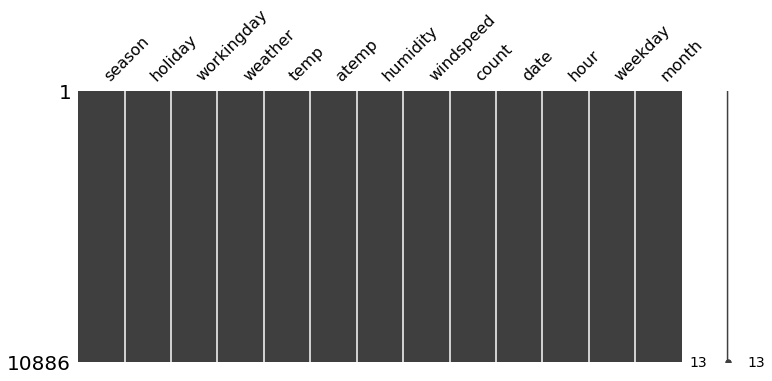

In [19]:
# Sprawdźmy braki danych
msno.matrix(bs,figsize=(12,5)) # Nie ma braków danych!

## 2. Operacje na wierszach i kolumnach (pakiet pandas)

In [20]:
# Jeśli chcemy wybrać kolumnę:
bs['count']

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [21]:
bs[['count', 'date', 'season']]

,count,date,season
0,16,2011-01-01,Spring
1,40,2011-01-01,Spring
2,32,2011-01-01,Spring
3,13,2011-01-01,Spring
4,1,2011-01-01,Spring
...,...,...,...
10881,336,2012-12-19,Winter
10882,241,2012-12-19,Winter
10883,168,2012-12-19,Winter
10884,129,2012-12-19,Winter


In [22]:
# Filtrowanie wierszy:
bs.loc[bs.season == 'Spring']

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,date,hour,weekday,month
0,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0000,16,2011-01-01,0,Saturday,January
1,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0000,40,2011-01-01,1,Saturday,January
2,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0000,32,2011-01-01,2,Saturday,January
3,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0000,13,2011-01-01,3,Saturday,January
4,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0000,1,2011-01-01,4,Saturday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6780,Spring,0,1,Clear + Few clouds + Partly cloudy + Partly c...,25.42,30.305,61,15.0013,549,2012-03-19,19,Monday,March
6781,Spring,0,1,Clear + Few clouds + Partly cloudy + Partly c...,24.60,30.305,64,15.0013,330,2012-03-19,20,Monday,March
6782,Spring,0,1,Clear + Few clouds + Partly cloudy + Partly c...,24.60,30.305,64,11.0014,223,2012-03-19,21,Monday,March
6783,Spring,0,1,"Mist + Cloudy, Mist + Broken clouds, Mist + F...",22.96,26.515,73,11.0014,148,2012-03-19,22,Monday,March


In [23]:
# Filtrowanie wierszy:
bs.loc[bs.season.isin(['Spring', 'Winter'])].head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,date,hour,weekday,month
0,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,16,2011-01-01,0,Saturday,January
1,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,40,2011-01-01,1,Saturday,January
2,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,32,2011-01-01,2,Saturday,January
3,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,13,2011-01-01,3,Saturday,January
4,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,1,2011-01-01,4,Saturday,January


In [24]:
# Wybranie wierszy, według położenia w tabeli
bs.iloc[0:5]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,date,hour,weekday,month
0,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,16,2011-01-01,0,Saturday,January
1,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,40,2011-01-01,1,Saturday,January
2,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,32,2011-01-01,2,Saturday,January
3,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,13,2011-01-01,3,Saturday,January
4,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,1,2011-01-01,4,Saturday,January


## 3. Analiza zmiennej objaśnianej

### 3.1. Analiza rozkładu empirycznego

/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.87626461, 6.87832647,
         6.88550967])),
 (1.3647396459244172, 4.591363690454027, 0.9611793780126952))

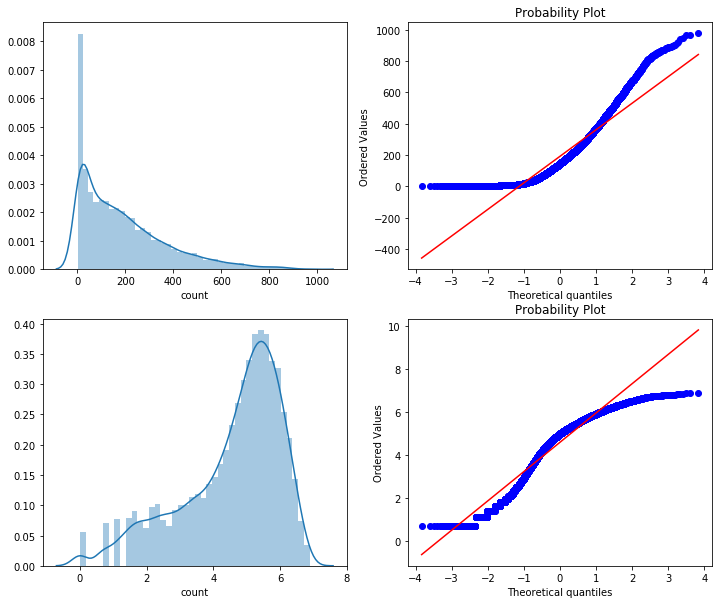

In [18]:
# Macierz wykresów 2x2
fig, axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
# Funkcja gęstości
sn.distplot(bs["count"],ax=axes[0][0])
# Wykres kwantylowy 
stats.probplot(bs["count"], dist='norm', fit=True, plot=axes[0][1])
# Gęstośc i wykresy kwantylowy dla zmiennej zlogarytmowanej
sn.distplot(np.log(bs["count"]),ax=axes[1][0])
stats.probplot(np.log1p(bs["count"]), dist='norm', fit=True, plot=axes[1][1])

### 3.2 Analiza szeregu czasowego

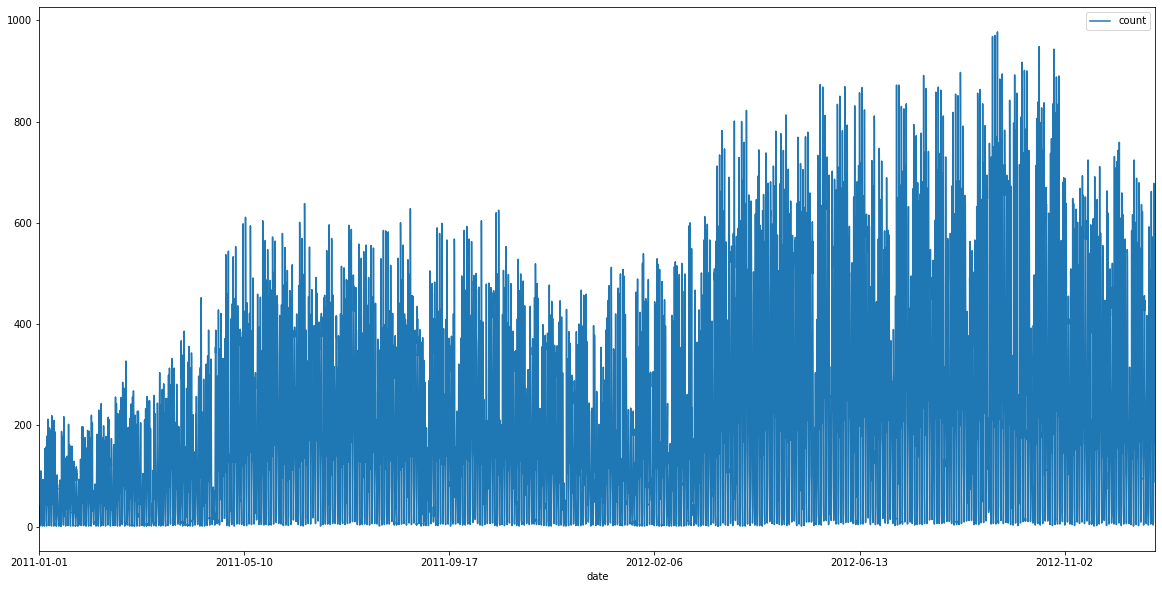

In [26]:
fig,ax = plt.subplots(ncols=1,nrows=1)
fig.set_size_inches(20, 10)
bs.plot('date', 'count', kind = 'line', ax = ax)

In [25]:
# Dane są bardzo wysokiej rodzielczości (24 obserwacje na dobę), spróbujmy spojrzeć na dane
# dzienne:
bs_ts = bs.groupby('date').agg({'count': 'sum'})
bs_ts # wyświetlamy wyniki

,count
date,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600
...,...
2012-12-15,5047
2012-12-16,3786
2012-12-17,4585


In [27]:
# zdefiniowanie jednostki czasu jako indeksu obserwacji - wygenerowanie szeregu czasowego:
bs_ts.index = pd.to_datetime(bs_ts.index)

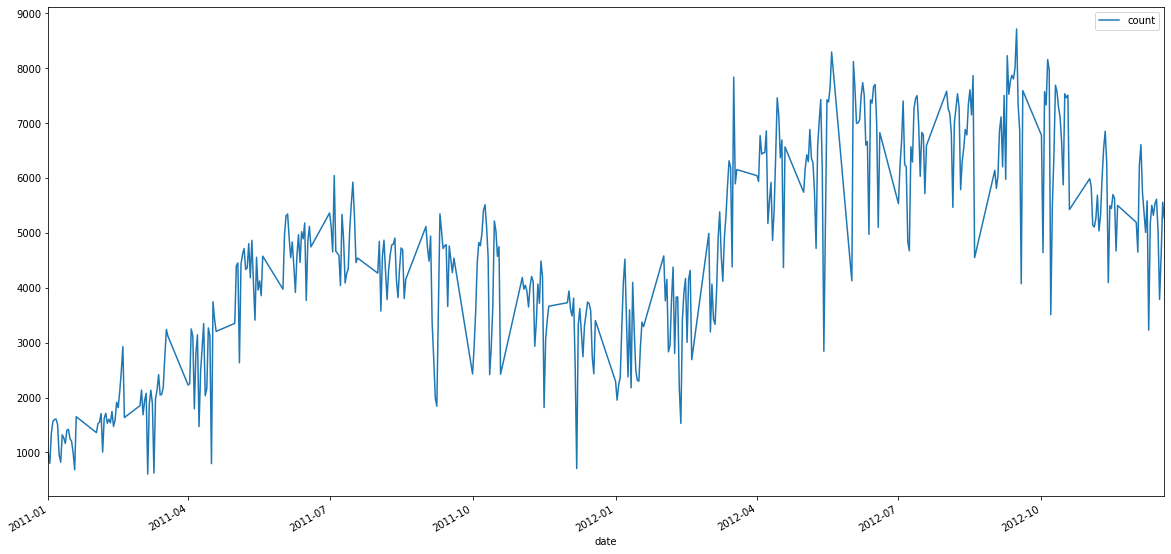

In [28]:
# Wygenerowanie wykresu dla danych zagregowanych:
fig,ax = plt.subplots(ncols=1,nrows=1)
fig.set_size_inches(20, 10)
bs_ts.plot( ax = ax)

### 3.3. Analiza w podziale na podgrupy

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

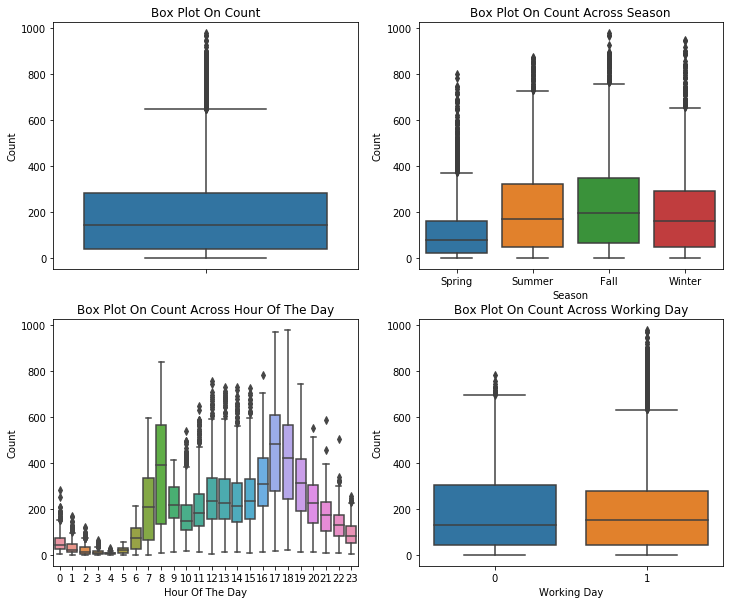

In [42]:
# Stworzenie płórna i obiektu z wykresami
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)

# Cztery boxploty
sn.boxplot(data=bs,y="count",orient="v",ax=axes[0][0])
sn.boxplot(data=bs,y="count",x="season",orient="v",ax=axes[0][1]) 
sn.boxplot(data=bs,y="count",x="hour",orient="v",ax=axes[1][0])
sn.boxplot(data=bs,y="count",x="workingday",orient="v",ax=axes[1][1])

# Wizualizacja - konfiguracja osi
axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

## 3.  Analiza wpływu zmiennych objaśniających (dyskretnych)

In [29]:
# Kolejność kategorii:
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

# Przygotowanie danych
monthAggregated = pd.DataFrame(bs.groupby("month")["count"].mean()).reset_index()
hourAggSeas = pd.DataFrame(bs.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
hourAggWday = pd.DataFrame(bs.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()


[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Weekdays'),
 None]

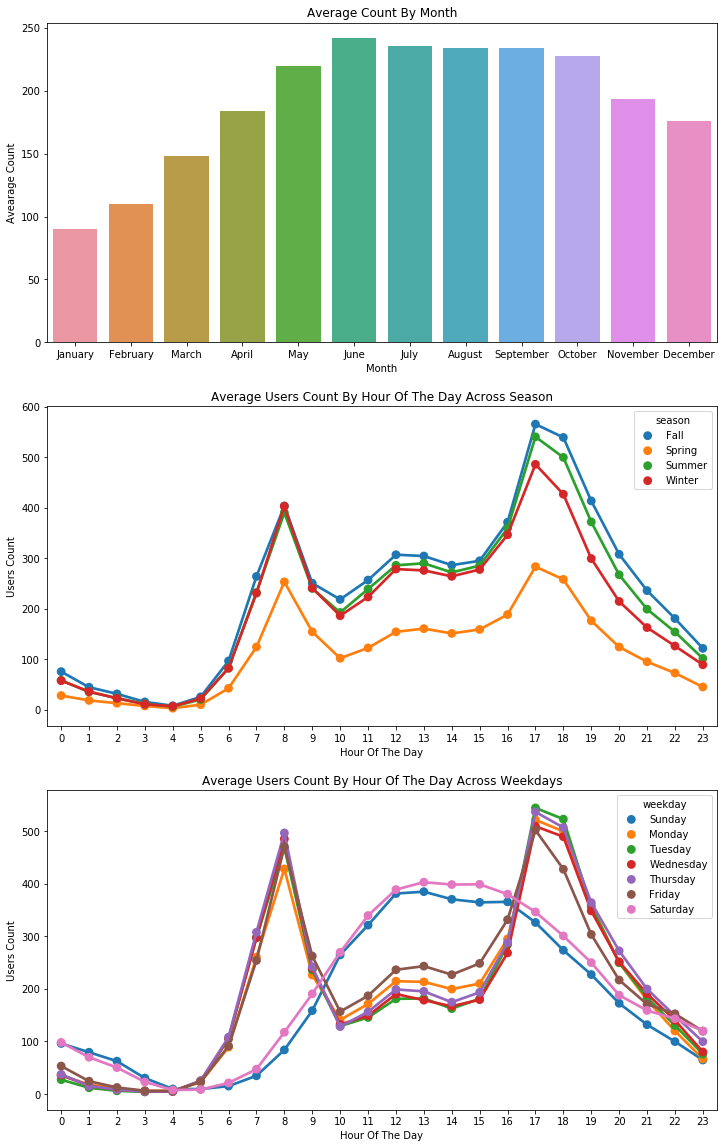

In [31]:
# Stwórzmy płótno i obiekty z wykresami
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3)
fig.set_size_inches(12,20)


# Wykresy
sn.barplot(data=monthAggregated, # dane
           x="month", # zmienna zamapowana na x
           y="count", # zmienna zamapowana na y
           ax=ax1, # do którego obiektu przypisać?
           order=sortOrder) # jak sortujemy obiekty
sn.pointplot(x="hour",  # zmienna zamapowana na x?
             y="count", # zmienna zamapowana na y?
             hue="season", # zmienna zamapowana jako kolor
             data=hourAggSeas, # dane 
             join=True, # czy łączyć punkty linią
             ax=ax2) # do którego obiektu przypisać wyniki?
sn.pointplot(x="hour", # zmienna zamapowana na x
             y="count",# zmienna zamapowana na y
             hue="weekday", # zmienna zamapowana jako kolor
             hue_order=hueOrder, #kolejność wyświetlania kolorów na legendzie
             data=hourAggWday, # dane 
             join=True, # czy łączyć punkty linią
             ax=ax3) # do którego obiektu przypisać wyniki?

ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

## 4. Analiza wpływu zmiennych objaśniających (ciągłych)

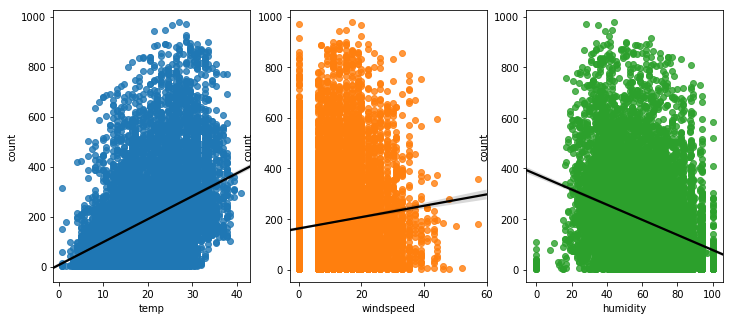

In [27]:
# Wykresy kropkowe z regresją:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="count", data=bs,ax=ax1, line_kws = {'color' : 'black'})
sn.regplot(x="windspeed", y="count", data=bs, ax=ax2, line_kws = {'color' : 'black'})
sn.regplot(x="humidity", y="count", data=bs, ax=ax3, line_kws = {'color' : 'black'})

## 5.  Analiza korelacji

In [43]:
# Wybierzmy zmienne ciągłe
corrMatt = bs[["temp","atemp","humidity","windspeed","count"]].corr()

In [44]:
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = 0 # Usunięcie eartości z maciezy dolnotrójkątnej
mask

array([[ 0.        ,  0.98494811, -0.06494877, -0.01785201,  0.39445364],
       [ 0.        ,  0.        , -0.04353571, -0.057473  ,  0.38978444],
       [ 0.        ,  0.        ,  0.        , -0.31860699, -0.31737148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.10136947],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

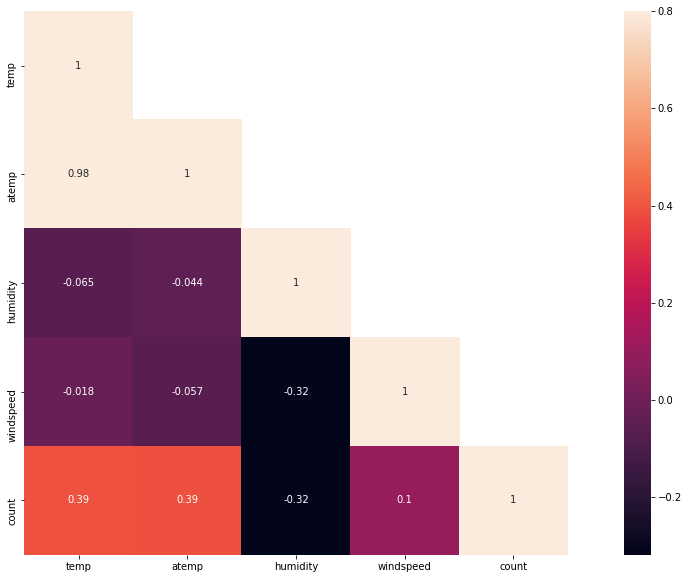

In [45]:
# Zamieniamy naarraya numpy'ego
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask = mask, vmax=.8, square=True,annot=True)

Więcej informacji: https://labmasters.pl/kursy-otwarte/python/p-1/